In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stat
header_row = 0

In [333]:
offense_stats = pd.read_csv('offense_stats.csv')
defense_stats = pd.read_csv('defense_stats.csv')
passing_stats = pd.read_csv('passing_stats.csv')
passdef_stats = pd.read_csv('passdef_stats.csv')
rushing_stats = pd.read_csv('rushing_stats.csv')
rushdef_stats = pd.read_csv('rushdef_stats.csv')

In [334]:
offense_stats.columns = offense_stats.iloc[header_row]
offense_stats = offense_stats.drop(header_row)

defense_stats.columns = defense_stats.iloc[header_row]
defense_stats = defense_stats.drop(header_row)

In [335]:
offense_stats = offense_stats.drop(columns=['Pen'])
offense_stats = offense_stats.drop(columns=['TO%'])
offense_stats = offense_stats.drop(columns=['Sc%'])
offense_stats = offense_stats.drop(columns=['Rk'])
offense_stats = offense_stats.drop(columns=['1stPy'])
offense_stats = offense_stats.iloc[: , :-2]
offense_stats = offense_stats.drop(columns=['1stD'])
offense_stats = offense_stats.drop(columns=['FL'])
offense_stats = offense_stats.rename(columns={"Tm": "Team", "G": "Game", "PF": "Total PF", "Ply": "Total Ply", "Y/P":"Total Y/P", "TO":"Total TOs"})
offense_stats.rename(columns={offense_stats.columns[3]: "Total Yards" }, inplace = True)
offense_stats

,Team,Game,Total PF,Total Yards,Total Ply,Total Y/P,Total TOs,Cmp,Att,Total Yards,TD,Int,NY/A,Att,Total Yards,TD,Y/A
1,Tampa Bay Buccaneers,13,410,5332,872,6.1,16,385,563,4084,36,10,7.0,292,1248,14,4.3
2,Dallas Cowboys,13,380,5318,892,6.0,18,339,501,3648,26,11,6.9,366,1670,11,4.6
3,Indianapolis Colts,13,371,4785,830,5.8,16,268,425,2813,22,6,6.3,383,1972,20,5.1
4,Los Angeles Rams,13,366,4999,806,6.2,14,317,474,3735,33,10,7.5,311,1264,8,4.1
5,Arizona Cardinals,13,366,4872,845,5.8,13,304,420,3279,22,10,7.3,394,1593,21,4.0
6,Buffalo Bills,13,363,4978,853,5.8,18,330,502,3405,28,12,6.5,329,1573,13,4.8
7,Cincinnati Bengals,13,354,4664,811,5.8,21,287,418,3251,26,14,7.1,352,1413,15,4.0
8,Los Angeles Chargers,13,351,5008,839,6.0,15,338,505,3644,30,11,6.8,307,1364,12,4.4
9,Kansas City Chiefs,13,351,5065,867,5.8,23,341,519,3613,27,12,6.7,324,1452,12,4.5
10,New England Patriots,13,350,4505,798,5.6,16,279,394,2899,18,8,6.9,380,1606,15,4.2


<AxesSubplot:xlabel='Y/A', ylabel='Y/P'>

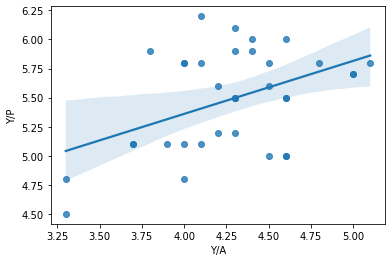

In [ ]:
offense_stats.dropna()
sns.regplot(x = offense_stats['Y/A'].astype(float), y = offense_stats['Y/P'].astype(float))

<AxesSubplot:xlabel='Y/A', ylabel='Y/P'>

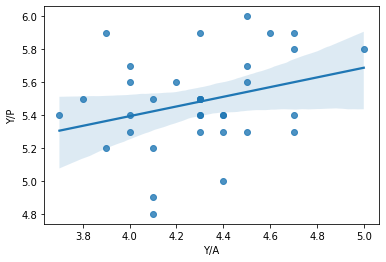

In [ ]:
defense_stats.dropna()
sns.regplot(x = defense_stats['Y/A'].astype(float), y = defense_stats['Y/P'].astype(float))

In [ ]:
passing_stats.dropna()
#passing_stats_w_kupp = passing_stats
#passing_stats_w_kupp.loc[35] = [0.0, 'Cooper Kupp', 13.0, np.NaN, 151, 74.8, 1489.0, 12, np.NaN, np.NaN, np.NaN, 59.0, 9.9, 9.9, 13.2, 114.5, 8.7, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
kupp_yds = 1489.0
kupp_df = passing_stats.loc[passing_stats['Yds'] < 1.75 * kupp_yds]
kupp_df

,Rk,Tm,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,...,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,EXP
27,28.0,Jacksonville Jaguars,13.0,273.0,468.0,58.3,2605.0,9.0,1.9,14.0,...,200.4,69.3,25.0,163.0,5.1,5.30,4.4,1.0,2.0,-19.98
28,29.0,New Orleans Saints,13.0,235.0,405.0,58.0,2573.0,25.0,6.2,11.0,...,197.9,88.0,24.0,175.0,5.6,6.00,6.0,1.0,2.0,23.18
29,30.0,Philadelphia Eagles,13.0,233.0,379.0,61.5,2551.0,15.0,4.0,8.0,...,196.2,87.3,23.0,137.0,5.7,6.30,6.2,1.0,1.0,42.74
30,31.0,Houston Texans,13.0,270.0,424.0,63.7,2428.0,13.0,3.1,13.0,...,186.8,79.2,37.0,277.0,8.0,5.30,4.6,NaN,NaN,-44.14
31,32.0,Chicago Bears,13.0,231.0,384.0,60.2,2295.0,12.0,3.1,16.0,...,176.5,73.5,42.0,307.0,9.9,5.40,4.3,1.0,1.0,-38.98
34,NaN,Avg Tm/G,NaN,22.7,34.8,65.1,234.5,1.6,4.5,0.8,...,234.5,91.3,2.3,15.7,6.1,6.32,6.2,NaN,NaN,NaN


We can tell that if we multiply the leading reciever Cooper Kupp's stats alone by 1.75, he would have more yards than 5 entire NFL teams. 

<AxesSubplot:xlabel='Cmp', ylabel='Y/G'>

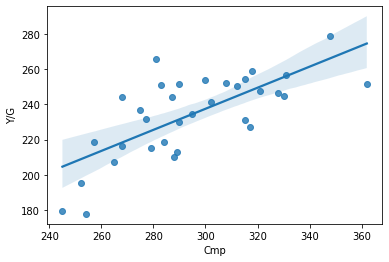

In [ ]:
passdef_stats.dropna()
passdef_stats = passdef_stats.loc[passdef_stats['Cmp'] < 1000]
passdef_stats = passdef_stats.loc[passdef_stats['Cmp'] > 100]
sns.regplot(x = passdef_stats['Cmp'].astype(float), y = passdef_stats['Y/G'].astype(float))


In [ ]:
rushing_stats.dropna()
#rushing_stats_w_jt = rushing_stats
#rushing_stats_w_jt.loc[35] = [0.0, 'Jonathan Taylor', 13.0, 241.0, 1348.0, 16.0, 83.0, 5.6, 103.7, 4.0, np.NaN]
jt_df = rushing_stats.loc[rushing_stats['Yds'] < 1348]
jt_df

,Rk,Tm,G,Att,Yds,TD,Lng,Y/A,Y/G,Fmb,EXP
22,23.0,Jacksonville Jaguars,13.0,288.0,1335.0,11.0,66.0,4.6,102.7,19.0,-13.88
23,24.0,Los Angeles Rams,13.0,311.0,1264.0,8.0,29.0,4.1,97.2,10.0,-13.92
24,25.0,Tampa Bay Buccaneers,13.0,292.0,1248.0,14.0,47.0,4.3,96.0,11.0,26.93
25,26.0,New York Giants,13.0,303.0,1225.0,8.0,46.0,4.0,94.2,16.0,-9.07
26,27.0,Atlanta Falcons,13.0,318.0,1184.0,8.0,39.0,3.7,91.1,18.0,-33.00
27,28.0,Pittsburgh Steelers,13.0,308.0,1149.0,8.0,26.0,3.7,88.4,15.0,-14.45
28,29.0,Las Vegas Raiders,13.0,288.0,1100.0,11.0,31.0,3.8,84.6,18.0,-37.02
29,30.0,New York Jets,13.0,277.0,1094.0,9.0,39.0,3.9,84.2,11.0,1.50
30,31.0,Miami Dolphins,13.0,311.0,1030.0,9.0,24.0,3.3,79.2,22.0,-34.71
31,32.0,Houston Texans,13.0,310.0,1008.0,6.0,35.0,3.3,77.5,16.0,-53.24


From this analysis, we can conclude that the Jags, Rams, Bucs, Giants, Falcons, Steelers, Raiders, Jets, Dolphins, and Texans have less total rush yards than Jonathan Taylor alone.

<AxesSubplot:xlabel='Att', ylabel='Y/G'>

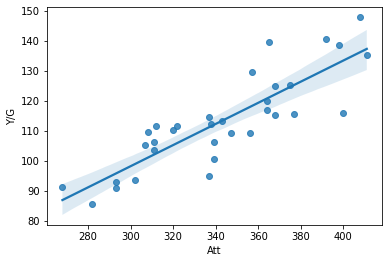

In [ ]:
rushdef_stats.dropna()
rushdef_stats = rushdef_stats.loc[rushdef_stats['Att'] < 1000]
rushdef_stats = rushdef_stats.loc[rushdef_stats['Att'] > 100]
sns.regplot(x = rushdef_stats['Att'].astype(float), y = rushdef_stats['Y/G'].astype(float))

<AxesSubplot:xlabel='Att', ylabel='Att'>

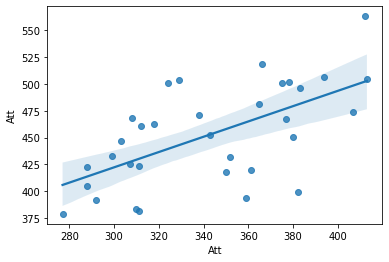

In [ ]:
passing_stats2 = passing_stats.loc[passing_stats['Att'] < 2000]
rushing_stats2 = rushing_stats.loc[rushing_stats['Att'] < 2000]
passing_stats2 = passing_stats2.loc[passing_stats2['Att'] > 100]
rushing_stats2 = rushing_stats2.loc[rushing_stats2['Att'] > 100]
sns.regplot(x = rushing_stats2['Att'].astype(float), y = passing_stats2['Att'].astype(float))

In [ ]:
df = pd.read_csv('week15matchups.csv')
df.head()

,Away,Home,AwayTD,HomeTD
0,Kansas City Chiefs,Los Angeles Chargers,12,12
1,Las Vegas Raiders,Cleveland Browns,11,17
2,New England Patriots,Indianapolis Colts,15,20
3,Dallas Cowboys,New York Giants,11,8
4,Arizona Cardinals,Detroit Lions,21,9


In [ ]:
td_df = pd.concat([df[['Home','Away','HomeTD']].assign(home=1).rename(
            columns={'Home':'team', 'Away':'opponent','HomeTD':'tds'}),
           df[['Away','Home','AwayTD']].assign(home=0).rename(
            columns={'Away':'team', 'Home':'opponent','AwayTD':'tds'})])

td_df

,team,opponent,tds,home
0,Los Angeles Chargers,Kansas City Chiefs,12,1
1,Cleveland Browns,Las Vegas Raiders,17,1
2,Indianapolis Colts,New England Patriots,20,1
3,New York Giants,Dallas Cowboys,8,1
4,Detroit Lions,Arizona Cardinals,9,1
5,Philadelphia Eagles,Washington Football Team,19,1
6,Buffalo Bills,Carolina Panthers,13,1
7,Pittsburgh Steelers,Tennessee Titans,8,1
8,Jacksonville Jaguars,Houston Texans,11,1
9,Miami Dolphins,New York Jets,9,1


In [ ]:
mod = smf.glm(formula="tds ~ home + team + opponent", family=sm.families.Binomial(), data=td_df).fit()
mod.summary()

C:\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1015: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    tds   No. Observations:                   32
Model:                            GLM   Df Residuals:                        0
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Sun, 19 Dec 2021   Deviance:                       28112.
Time:                        14:51:04   Pearson chi2:                 2.06e+19
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             7.163e+16   1.41e+07   5.06e+09      0.000    7.16e+16    7.16e+16
team[T.Atlanta Falcons]              -1.161e+16   3.27e+07  -3.55e+08      0.000   -1.16e+16   -1.16e+16
team[T.Baltimore Ravens]              5.889e+15   3.27e+07    1.8e+08      0.000    5.89e+15    5.89e+15
team[T.Buffalo Bills]                 2.511e+15   3.27e+07   7.69e+07      0.000    2.51e+15    2.51e+15
team[T.Carolina Panthers]             1.203e+16   3.27e+07   3.68e+08      0.000     1.2e+16     1.2e+16
team[T.Chicago Bears]                -7.622e+15   3.27e+07  -2.33e+08      0.000   -7.62e+15   -7.62e+15
team[T.Cincinnati Bengals]            1.203e+16   3.27e+07   3.68e+08      0.000     1.2e+16     1.2e+16
team[T.Cleveland Browns]              1.602e+16   3.27e+07    4.9e+08      0.000     1.6e+16     1.6e+16
team[T.Dallas Cowboys]               -1.476e+15   3.27e+07  -4.52e+07      0.000   -1.48e+15   -1.48e+15
team[T.Denver Broncos]               -8.665e+14   3.27e+07  -2.65e+07      0.000   -8.67e+14   -8.67e+14
team[T.Detroit Lions]                  -2.2e+16   6.16e+07  -3.57e+08      0.000    -2.2e+16    -2.2e+16
team[T.Green Bay Packers]            -8.232e+15   3.27e+07  -2.52e+08      0.000   -8.23e+15   -8.23e+15
team[T.Houston Texans]               -1.836e+16   3.27e+07  -5.62e+08      0.000   -1.84e+16   -1.84e+16
team[T.Indianapolis Colts]            2.616e+16   3.27e+07   8.01e+08      0.000    2.62e+16    2.62e+16
team[T.Jacksonville Jaguars]         -4.244e+15   3.27e+07   -1.3e+08      0.000   -4.24e+15   -4.24e+15
team[T.Kansas City Chiefs]            1.901e+15   3.27e+07   5.82e+07      0.000     1.9e+15     1.9e+15
team[T.Las Vegas Raiders]            -1.476e+15   3.27e+07  -4.52e+07      0.000   -1.48e+15   -1.48e+15
team[T.Los Angeles Chargers]         -8.665e+14   3.27e+07  -2.65e+07      0.000   -8.67e+14   -8.67e+14
team[T.Los Angeles Rams]             -1.438e+16   3.27e+07   -4.4e+08      0.000   -1.44e+16   -1.44e+16
team[T.Miami Dolphins]                 -1.1e+16   3.27e+07  -3.37e+08      0.000    -1.1e+16    -1.1e+16
team[T.Minnesota Vikings]            -8.232e+15   3.27e+07  -2.52e+08      0.000   -8.23e+15   -8.23e+15
team[T.New England Patriots]          1.203e+16   3.27e+07   3.68e+08      0.000     1.2e+16     1.2e+16
team[T.New Orleans Saints]            1.901e+15   3.27e+07   5.82e+07      0.000     1.9e+15     1.9e+15
team[T.New York Giants]              -1.438e+16   3.27e+07   -4.4e+08      0.000   -1.44e+16   -1.44e+16
team[T.New York Jets]                -8.232e+15   3.27e+07  -2.52e+08      0.000   -8.23e+15   -8.23e+15
team[T.Philadelphia Eagles]           2.278e+16   3.27e+07   6.97e+08      0.000    2.28e+16    2.28e+16
team[T.Pittsburgh Steelers]          -

In [ ]:
import random as rand
def simulate_game(model, homeTeam, awayTeam, max_tds):
    home_tds_avg = model.predict(pd.DataFrame(data={'team': homeTeam, 'opponent': awayTeam,'home':1},index=[1])).values[0]
    away_tds_avg = model.predict(pd.DataFrame(data={'team': awayTeam, 'opponent': homeTeam,'home':0},index=[1])).values[0]
    team_pred = [[stat.binom.pmf(k = rand.randint(1, max_tds), n = i, p = team_avg) for i in range(0, max_tds+1)] for team_avg in [home_tds_avg, away_tds_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))


In [ ]:
homeTeam = "New York Giants"
awayTeam = "Dallas Cowboys"
sim = simulate_game(mod, homeTeam, awayTeam, max_tds=9)

In [ ]:
def check_winner(homeTeam, awayTeam, sim):
    home_prob = np.sum(np.tril(sim, 1))
    away_prob = np.sum(np.triu(sim, 1))
    print(str(home_prob))
    print(str(away_prob))
    if home_prob > away_prob:
        print(str(homeTeam) + " will beat the " + str(awayTeam))
    elif away_prob > home_prob:
        print(str(awayTeam) + " will beat the " + str(homeTeam))
    else:
        print(str(homeTeam) + " and " + str(awayTeam) + " will tie")
    print('\n')

In [ ]:
for i, cont in df.iterrows():
    away = cont[0]
    home = cont[1]
    sim = simulate_game(mod, home, away, 9)
    check_winner(away, home, sim)

0.0
0.0
Kansas City Chiefs and Los Angeles Chargers will tie


0.0
0.0
Las Vegas Raiders and Cleveland Browns will tie


0.0
0.0
New England Patriots and Indianapolis Colts will tie


0.0
0.0
Dallas Cowboys and New York Giants will tie


0.0
0.0
Arizona Cardinals and Detroit Lions will tie


1.0
0.0
Washington Football Team will beat the Philadelphia Eagles


2.0
0.0
Carolina Panthers will beat the Buffalo Bills


0.0
0.0
Tennessee Titans and Pittsburgh Steelers will tie


0.0
0.0
Houston Texans and Jacksonville Jaguars will tie


0.0
0.0
New York Jets and Miami Dolphins will tie


0.0
0.0
Green Bay Packers and Baltimore Ravens will tie


0.0
0.0
Atlanta Falcons and San Francisco 49ers will tie


1.0
0.0
Cincinnati Bengals will beat the Denver Broncos


1.0
0.0
Seattle Seahawks will beat the Los Angeles Rams


2.0
1.0
New Orleans Saints will beat the Tampa Bay Buccaneers


0.0
0.0
Minnesota Vikings and Chicago Bears will tie


